In [1]:
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
%matplotlib inline
#plt.style.use(['fivethirtyeight'])
#mpl.rcParams['lines.linewidth'] = 2

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set(rc={'figure.figsize':(12,7)})
sns.set(style='white')


#### Reading the data

In [2]:
location1 = r"C:\Users\madhu\Downloads\Compressed\coronavirusdataset\patient.csv"
location2 = r"C:\Users\madhu\Downloads\Compressed\coronavirusdataset\route.csv"
location3 = r"C:\Users\madhu\Downloads\Compressed\coronavirusdataset\time.csv"
patient = pd.read_csv(location1)
route = pd.read_csv(location2)
time = pd.read_csv(location3)

In [3]:
patient.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


#### Checking for dtypes and missing data

In [4]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5766 entries, 0 to 5765
Data columns (total 14 columns):
id                  5766 non-null int64
sex                 417 non-null object
birth_year          404 non-null float64
country             5765 non-null object
region              406 non-null object
group               83 non-null object
infection_reason    146 non-null object
infection_order     35 non-null float64
infected_by         70 non-null float64
contact_number      50 non-null float64
confirmed_date      5765 non-null object
released_date       32 non-null object
deceased_date       20 non-null object
state               5765 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 630.8+ KB


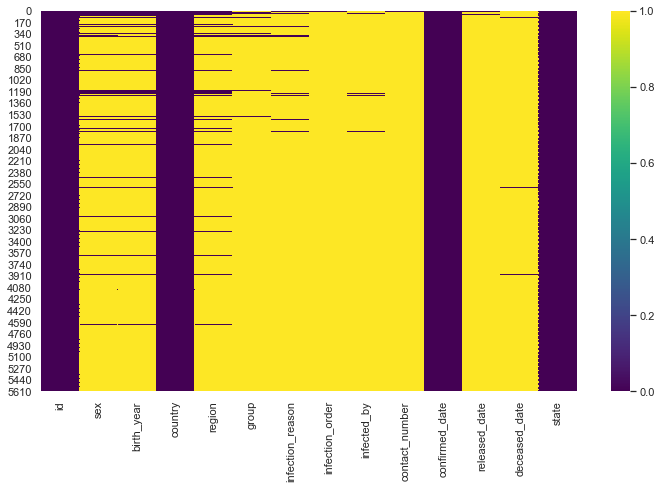

In [5]:
plt.figure(figsize=(12,7))
sns.heatmap(patient.isnull(), cmap='viridis')
plt.show()

In [6]:
patient.isnull().sum()

id                     0
sex                 5349
birth_year          5362
country                1
region              5360
group               5683
infection_reason    5620
infection_order     5731
infected_by         5696
contact_number      5716
confirmed_date         1
released_date       5734
deceased_date       5746
state                  1
dtype: int64

#### Item counts in Categorical features

In [7]:
patient.columns

Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [8]:
column = ['sex', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 
       'state']
for col in column:
    print(patient[col].value_counts())
    print('\n')

female    212
male      205
Name: sex, dtype: int64


Korea       5756
China          8
Mongolia       1
Name: country, dtype: int64


capital area           191
Gyeongsangbuk-do       121
Daegu                   46
Daejeon                 13
Gwangju                 11
Gangwon-do               5
filtered at airport      4
Jeollabuk-do             3
Jeollanam-do             3
Chungcheongbuk-do        2
Jeju-do                  2
Ulsan                    2
Busan                    2
Chungcheongnam-do        1
Name: region, dtype: int64


Shincheonji Church               53
Eunpyeong St. Mary's Hospital    13
Cheongdo Daenam Hospital          9
Pilgrimage                        6
Myungsung church                  1
Onchun Church                     1
Name: group, dtype: int64


contact with patient                 75
visit to Daegu                       43
visit to Wuhan                        8
pilgrimage to Israel                  6
contact with patient in Singapore     2
visit to Thail

Distibution of patients in the study group

#### Region where the samples were detected

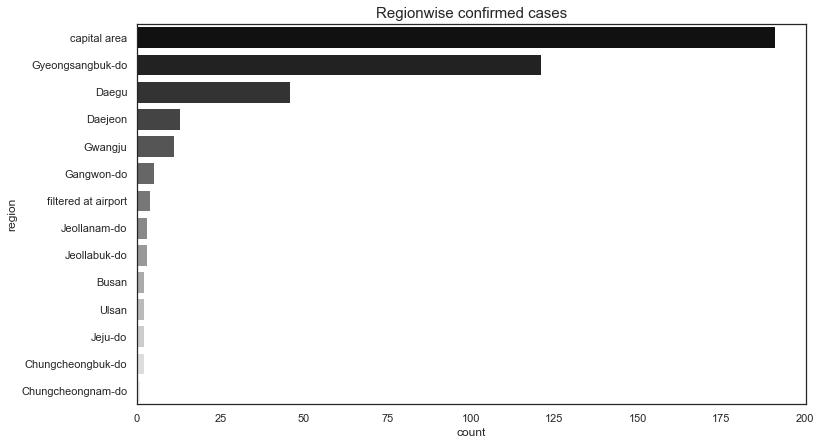

In [9]:
plt.figure(figsize=(12,7))
area = list(patient['region'].value_counts().sort_values(ascending=False).index)
region_data = patient.region.value_counts().rename_axis('region').reset_index(name='count')
sns.barplot(x='count', y='region', order=area, data=region_data, palette='gist_gray')
plt.title('Regionwise confirmed cases', fontsize=15)
plt.show()

#### Plotting condition of known patients

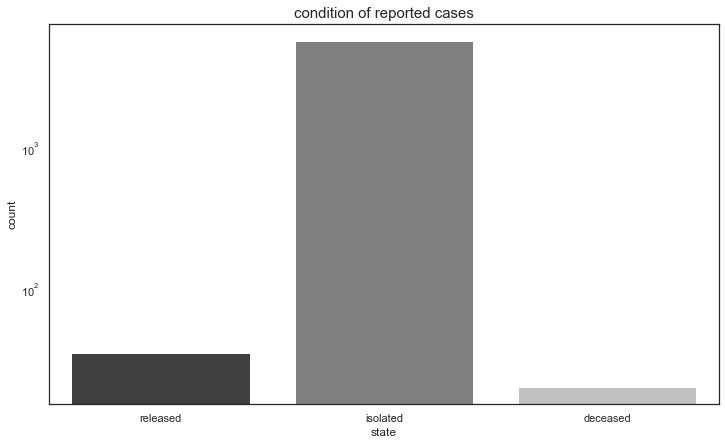

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(patient.state, palette='gist_gray')
plt.yscale('log')
plt.title('condition of reported cases', fontsize=15)
plt.show()

#### Condition based on Gender and Age

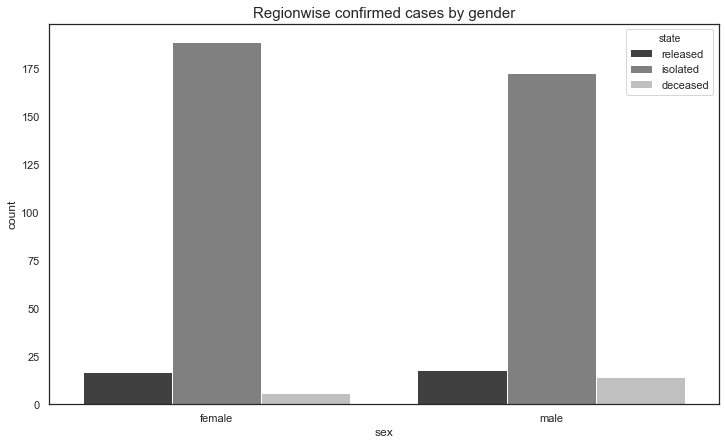

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(patient.sex, palette='gist_gray',hue=patient.state)
#plt.yscale('log')
plt.title('Regionwise confirmed cases by gender', fontsize=15)
plt.show()

#### Plotting the Reason of Infection

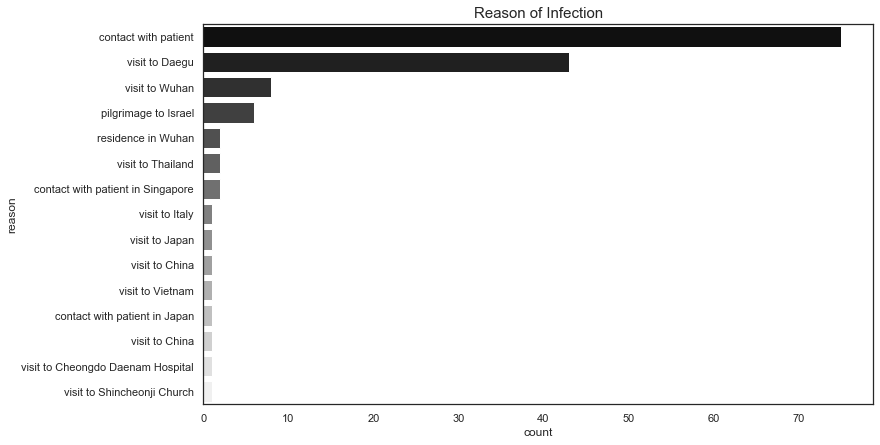

In [12]:
plt.figure(figsize=(12,7))
reason_list = list(patient.infection_reason.value_counts().sort_values(ascending=False).index)
reason_data = patient.infection_reason.value_counts().rename_axis('reason').reset_index(name='count')
sns.barplot(x='count', y='reason', order=reason_list, data=reason_data, palette='gist_gray')
plt.title('Reason of Infection', fontsize=15)
plt.show()

#### Distribution of Age

In [13]:
patient['age'] = 2020 - patient.birth_year

In [14]:
def age_grp(age):
    if age > 0:
        if age%10 != 0:
            lower = int(floor(age/10)*10)
            upper = int(ceil(age/10)*10)-1
            return '{}-{}'.format(lower, upper)
        else:
            lower = int(age)
            upper = int(age)+9
            return '{}-{}'.format(lower,upper)
    else:
        return np.nan

In [15]:
patient['age_group'] = patient.age.apply(age_grp)

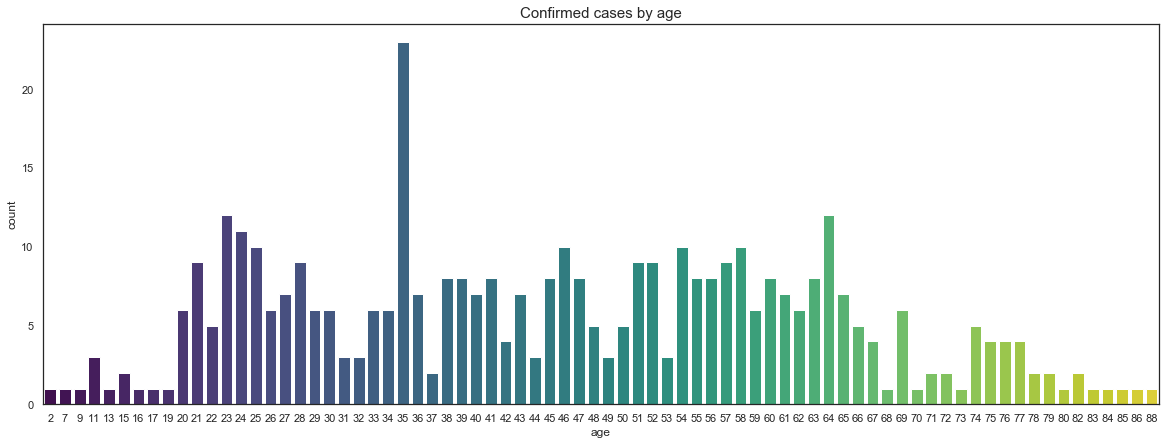

In [16]:
# Plotting age of affected peaple
sns.set(rc={'figure.figsize':(20,7)})
sns.set(style='white')
sns.countplot(patient.age.dropna().astype('int64'), orient='h', palette='viridis')
plt.title('Confirmed cases by age', fontsize=15)
plt.show()

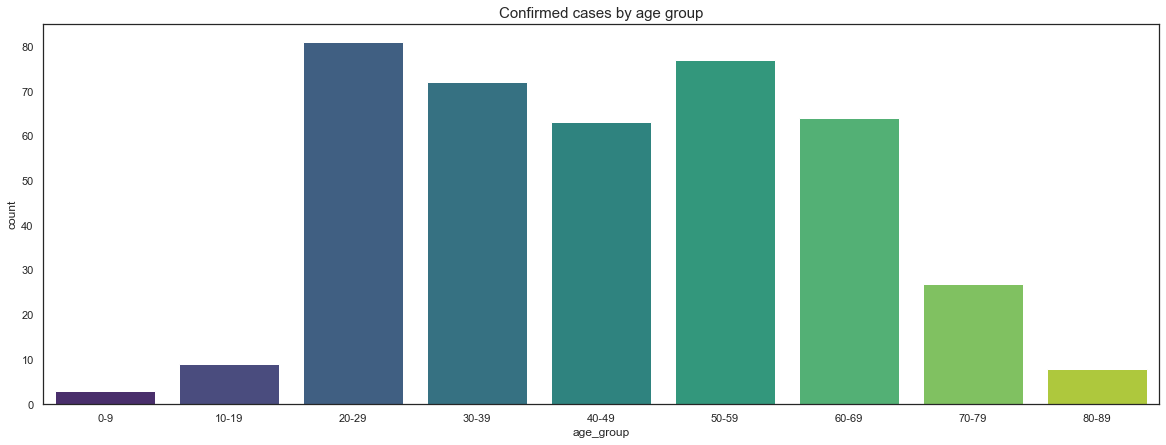

In [17]:
# Plotting age of affected peaple
sns.set(rc={'figure.figsize':(20,7)})
sns.set(style='white')
sns.countplot(patient.age_group.dropna().sort_values(ascending=True), orient='h', palette='viridis')
plt.title('Confirmed cases by age group', fontsize=15)
plt.show()

#### Days taken for recovery and death

In [18]:
# Parsing dates
import datetime as dt
patient.confirmed_date = pd.to_datetime(patient.confirmed_date)
patient.released_date = pd.to_datetime(patient.released_date)
patient.deceased_date = pd.to_datetime(patient.deceased_date)

In [19]:
# Extracting days to recovery and days to death
patient['days_to_recovery'] =  abs((patient.released_date - patient.confirmed_date).dt.days)
patient['days_to_death'] =  abs((patient.deceased_date - patient.confirmed_date).dt.days)

In [20]:
# Seperate dataframes for recovery and death data
data_recovery = patient.days_to_recovery.value_counts().sort_index().rename_axis('days_to_recovery').reset_index(name='Count')
data_death = patient.days_to_death.value_counts().sort_index().rename_axis('days_to_death').reset_index(name='Count')

In [21]:
# Changing the datatype of number of days to recovery and death
data_recovery.days_to_recovery = data_recovery.days_to_recovery.astype('int64').astype('object')
data_death.days_to_death = data_death.days_to_death.astype('int64').astype('object')

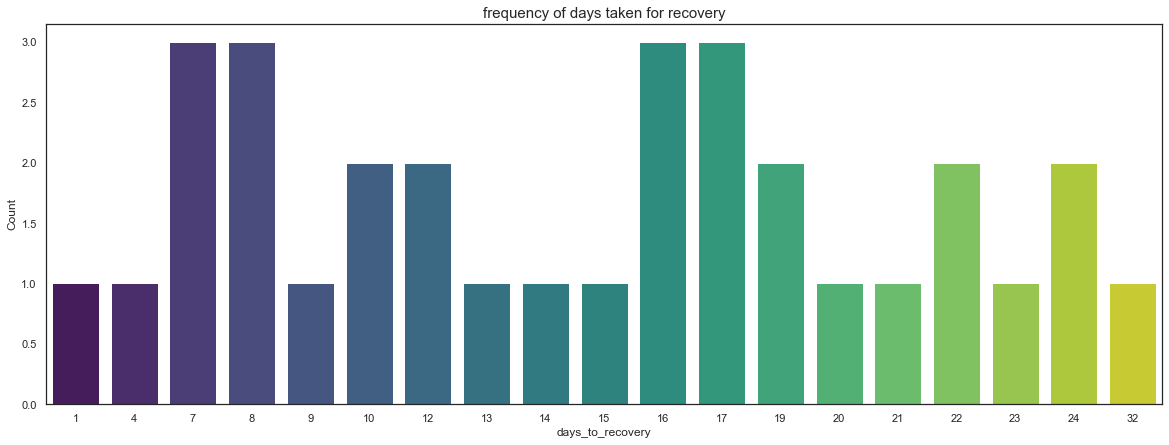

In [22]:
# Plotting the frequency of days to death
sns.barplot(x='days_to_recovery', y='Count', data = data_recovery, palette='viridis', orient='v')
plt.title('frequency of days taken for recovery', fontsize=15)
plt.show()

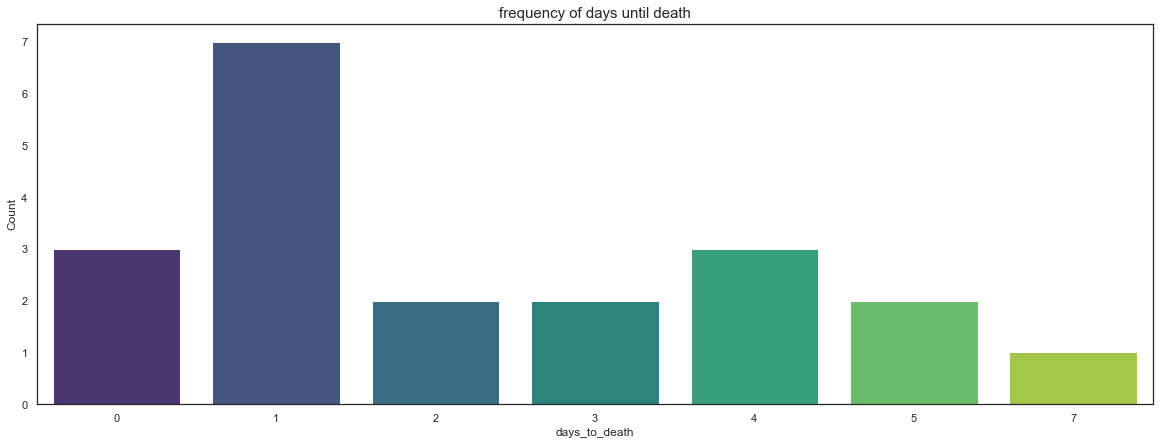

In [23]:
# Plotting the frequency of days to death
sns.barplot(x='days_to_death', y='Count', data = data_death, palette='viridis', orient='v')
plt.title('frequency of days until death', fontsize=15)
plt.show()

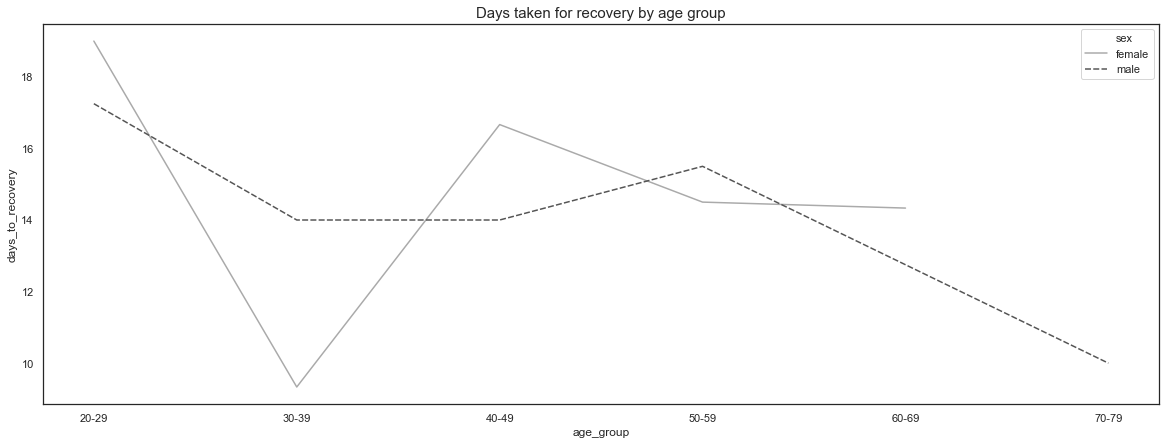

In [24]:
recovery_data = patient.groupby(['age_group', 'sex']).mean()['days_to_recovery'].dropna().reset_index().rename_axis()
ax = sns.lineplot(x='age_group', y='days_to_recovery',hue='sex',style='sex', data=recovery_data, palette='gist_gray_r')
plt.title('Days taken for recovery by age group', fontsize=15)
plt.show()

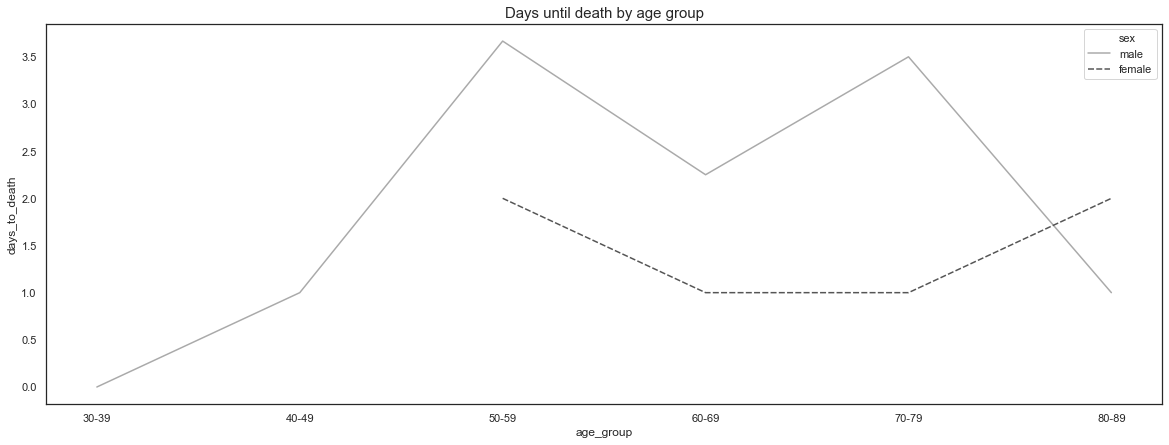

In [25]:
death_data = patient.groupby(['age_group', 'sex']).mean()['days_to_death'].dropna().reset_index().rename_axis()
ax = sns.lineplot(x='age_group', y='days_to_death',hue='sex',style='sex', data=death_data, palette='gist_gray_r')
plt.title('Days until death by age group', fontsize=15)
plt.show()

#### Analyzing the Time-Series data

In [26]:
time.head()

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0


In [27]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 11 columns):
date             45 non-null object
acc_test         45 non-null int64
acc_negative     45 non-null int64
acc_confirmed    45 non-null int64
acc_released     45 non-null int64
acc_deceased     45 non-null int64
new_test         45 non-null int64
new_negative     45 non-null int64
new_confirmed    45 non-null int64
new_released     45 non-null int64
new_deceased     45 non-null int64
dtypes: int64(10), object(1)
memory usage: 4.0+ KB


In [28]:
time = time.set_index('date')
time.head()

,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
date,,,,,,,,,,
2020-01-20,1,0,1,0,0,1,0,1,0,0
2020-01-21,1,0,1,0,0,0,0,0,0,0
2020-01-22,4,3,1,0,0,3,3,0,0,0
2020-01-23,22,21,1,0,0,18,18,0,0,0
2020-01-24,27,25,2,0,0,5,4,1,0,0


#### Plotting the number of cases against the date

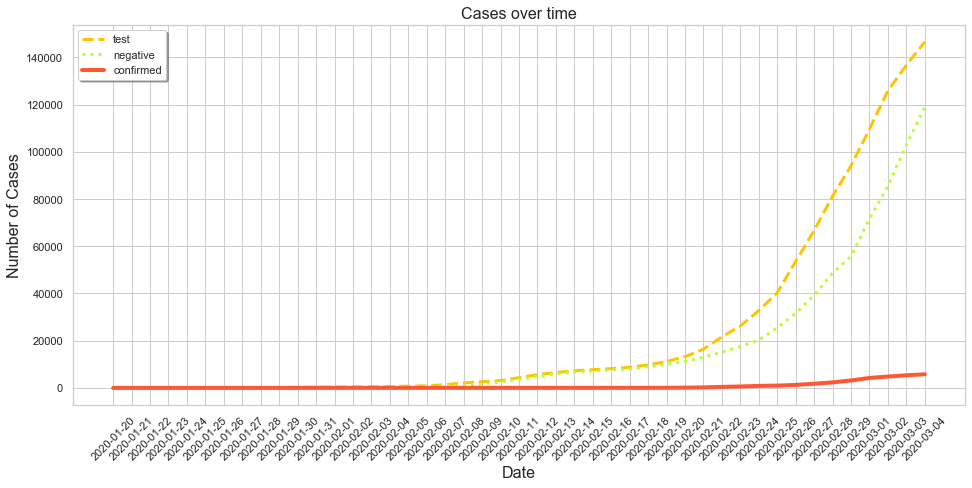

In [29]:
#mpl.style.use('fivethirtyeight')
sns.set(style='whitegrid')
fig, ax = plt.subplots(figsize=(16,7))
ax.plot(time['acc_test'], label='test', linestyle='dashed', color='#FFC300', linewidth=3, markersize=6)
ax.plot(time['acc_negative'], label='negative', linestyle='dotted', color='#B6FF33', linewidth=3, markersize=6)
ax.plot(time['acc_confirmed'], label='confirmed', color='#FF5733', linewidth=4, markersize=6)
plt.title("Cases over time", fontsize=16)
#ax.set_xticks()
#plt.yscale('log')
ax.set_xticklabels(time.index, rotation=45)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Cases', fontsize=16)
plt.legend(loc='upper left', fancybox=True, shadow=True)
plt.show()

#### Geospatial plotting

In [30]:
import folium
southkorea_map = folium.Map(location=[36.55,126.983333 ], zoom_start=7,tiles='cartodbpositron')

for lat, lon,city in zip(route['latitude'], route['longitude'], route['city']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='black',
                      popup =('City: ' + str(city) + '<br>'),
                        fill_color='black',
                        fill_opacity= 0.8).add_to(southkorea_map)
southkorea_map